In [2]:
#import package
import matplotlib.pyplot as pp
import pandas as pd
import numpy as np
import math
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
pp.style.use('ggplot')
py.sign_in('yy0919','HIfjPTCYuLUrerA5kMAx') #plotly API key
print(plotly.__version__) #plotly version
plotly.offline.init_notebook_mode() #run at the start

2.0.11


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [3]:
#import dataset:HR and do clear data
HR=pd.read_csv('IBM-HR-Employee-Attrition.csv')
HR=HR.drop(['EmployeeCount','EmployeeNumber',  'Over18', 'StandardHours'], axis=1)
HR.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [4]:
#transfer some numeric variable to categorical variable for better data visualization. 
HR['Education']=HR['Education'].replace(1,'Below College').replace(2
,'College').replace(3,'Bachelor').replace(4, 'Master').replace(5, 'Doctor')
#transfer EnvironmentSatisfaction   
HR['EnvironmentSatisfaction']=HR['EnvironmentSatisfaction'].replace(1,'Low').replace(2 
,'Medium').replace(3, 'High').replace(4,'Very High')
#transfer JobInvolvement   
HR['JobInvolvement']=HR['JobInvolvement'].replace(1,'Low').replace(2 
,'Medium').replace(3, 'High').replace(4,'Very High')
#transfer JobSatisfaction 
HR['JobSatisfaction']=HR['JobSatisfaction'].replace(1,'Low').replace(2 
,'Medium').replace(3, 'High').replace(4,'Very High')
#transfer performacerating
HR['PerformanceRating']=HR['PerformanceRating'].replace(1,'Low').replace(2 
,'Good').replace(3, 'Excellent').replace(4,'Outstanding')
#tranfer RelationshipSatisfaction 
HR['RelationshipSatisfaction']=HR['RelationshipSatisfaction'].replace(1,'Low').replace(2 
,'Medium').replace(3, 'High').replace(4,'Very High')
#transfer WorkLifeBalance
HR['WorkLifeBalance']=HR['WorkLifeBalance'].replace(1,'Bad').replace(2 
,'Good').replace(3, 'Better').replace(4,'Best')

In [5]:
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [6]:
# create attrition group containing employees who had left company and nonattrition 
#group containing employees who still stay at company
attrition=HR[HR.Attrition=='Yes']
nonattrition=HR[HR.Attrition=='No']

In [7]:
#def function to plot pie-chart for categoical variable.
def piechart_compare_figure(variable):
    nonattri_label=nonattrition[variable].value_counts().index
    nonattri_value=nonattrition[variable].value_counts().values
    attri_label=attrition[variable].value_counts().index
    attri_value=attrition[variable].value_counts().values 
    fig = {
        "data": [
            {
                "values": attri_value,
                "labels": attri_label,
                "domain": {"x": [0, .48]},
                "name": "Leaving employment",
                "hoverinfo":"label+percent+name",
                "hole": .4,
                "type": "pie"
            },
            {
                "values": nonattri_value,
                "labels": nonattri_label,
                "text":"nonattrition",
                "textposition":"inside",
                "domain": {"x": [.52, 1]},
                "name": "staying employment",
                "hoverinfo":"label+percent+name",
                "hole": .4,
                "type": "pie"
            }],
        "layout": {
            "title":"Percentage of {} in Attrition and Nonattrition Group ".format(variable),
            "annotations": [
                {
                    "font": {
                        "size": 20
                    },
                    "showarrow": False,
                    "text": "Attrition",
                    "x": 0.15,
                    "y": 0.5
                },
                {
                    "font": {
                        "size": 20
                    },
                    "showarrow": False,
                    "text": "Nonattrition",
                    "x": 0.9,
                    "y": 0.5
                }
            ]
        }
    }
    return fig

In [8]:
figure=piechart_compare_figure('JobRole')
py.iplot(figure, filename='donut')

In [9]:
figure=piechart_compare_figure('Department')
py.iplot(figure, filename='donut')

In [11]:
figure=piechart_compare_figure('Education')
py.iplot(figure, filename='donut')

In [12]:
figure=piechart_compare_figure('WorkLifeBalance')
py.iplot(figure, filename='donut')

In [13]:
figure=piechart_compare_figure('OverTime')
py.iplot(figure, filename='donut')

In [14]:
def barchart_compare(x_variable, y_variable): #x should be categorical and Y is continuous
    data_yes=attrition.groupby(x_variable).mean()[y_variable]
    #find mean value of y in different x group in attrition group
    data_no=nonattrition.groupby(x_variable).mean()[y_variable]
    #find mean value of y in different x group in nonattrition group
    ylim=data_no.max()*1.3 #determine ylim on graph. ylim= maximum value multiplies 1.3
    #draw nonattrition group
    pp.subplot(121)
    pp.ylim(0,ylim)
    pp.ylabel('Average {}'.format(y_variable))
    data_yes.plot(kind='bar', title='Attrition Group',color='red')
    pp.subplot(122)
    pp.ylim(0,ylim)
    data_no.plot(kind='bar', title='Nonattrition Group',color='blue')
    pp.show()

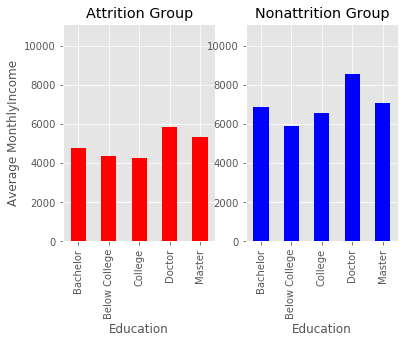

In [15]:
barchart_compare('Education','MonthlyIncome')

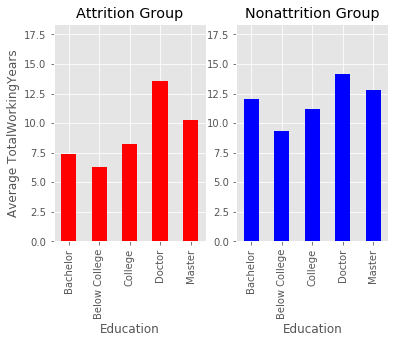

In [16]:
barchart_compare('Education','TotalWorkingYears')

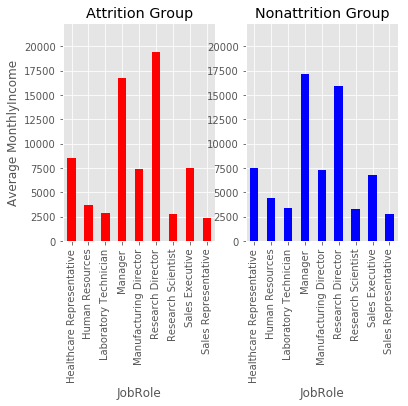

In [18]:
barchart_compare('JobRole','MonthlyIncome')

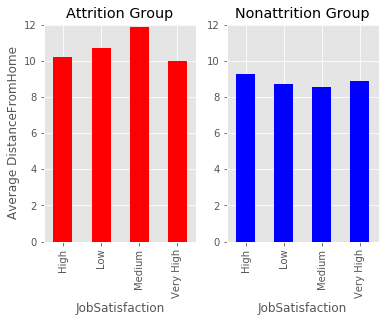

In [19]:
barchart_compare('JobSatisfaction','DistanceFromHome')

In [21]:
#for KNN method, import dataset to normalize
HR=pd.read_csv('/Users/yang/Desktop/2017fall/data mining/project2/IBM-HR-Employee-Attrition.csv')
HR=HR.drop(['EmployeeCount','EmployeeNumber',  'Over18', 'StandardHours'], axis=1)
#Select numeric variables in dataset
object_name=HR.select_dtypes(['object']).columns.values
HR_KNN=HR.drop(object_name,axis=1)
HR_KNN.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [22]:
class Classifier_KNN:
    
    #define function to get median number of numeric variable
    def getmedian(self,variable):
        list=variable.tolist()
        if list==[]:
            return []
        sort_list=sorted(list)
        length=len(sort_list)
        if length%2==1:
            return sort_list[int((length+1)/2-1)]
        else:
            return (sort_list[int(length/2-1)]+sort_list[int(length/2)])/2
        
    #define a function to calcualte standard deviation of variable
    def getabsolutestardanddeviation(self,variable):
        sum=0
        median=self.getmedian(variable)
        for item in variable:
            sum+=abs(item-median)
        return sum/len(variable)
    
    # define a function to normalized variable for a dataset
    def normalizecolumn(self,dataset):
        for i in dataset.columns.values:
            vector=dataset[i]
            vector_median=self.getmedian(vector)#get median number 
            vector_asd=self.getabsolutestardanddeviation(vector)#get standard deviation of variable
            dataset[i]=(vector-vector_median)/vector_asd
    #Define Manhattan function. absolute value between two items
    def manhattan(self,vector1,vector2):
        distance=0
        total=0
        n=len(vector1)
        for i in range(n):
            distance+=abs(vector1[i]-vector2[i])#sum of absolute distance
        return distance
    
    # new method
    #K Nearest Neighbors(KNN) 
    #creates a sorted list of items based on their distance to item
    #K=5
    def classify(self,id_number,traindata):
        distances=[]
        for id_other in traindata.index:
            distance=self.manhattan(HR_KNN.loc[id_number],traindata.loc[id_other])
            distances.append((distance,id_other))
        distances.sort()
        neighbor=distances[1:6]
        attrition_vote=0
        nonattrition_vote=0
        for i in pd.DataFrame(neighbor).iloc[:,1]:
            item=HR.loc[i][1]
            if item=='Yes':
                attrition_vote+=1
            elif item=='No':
                nonattrition_vote+=1
            if attrition_vote > nonattrition_vote:
                return('Yes')
            elif attrition_vote < nonattrition_vote:
                return('No')
    
    # test the accuracy of KNN method and print result

    def KNN_accuracy(self,train_data,test_data):
        result={}
        n11=0;n22=0;n12=0;n21=0
        for id in test_data.index:
            classify_result={id:self.classify(id,train_data)}
            result.update(classify_result)
            if classify_result[id]=='Yes'and HR.loc[id][1]=='Yes':
                n11=n11+1
            elif classify_result[id]=='No'and HR.loc[id][1]=='No':
                n22=n22+1
            elif classify_result[id]=='Yes'and HR.loc[id][1]=='No':
                n12=n12+1
            elif classify_result[id]=='No'and HR.loc[id][1]=='Yes':
                n21=n21+1
        n=n11+n12+n21+n22
        p=(n11+n22)/n
        r=((n11+n12)/n)*(n11+n21)+((n21+n22)/n)*(n12+n22)
        pr=r/n
        #print result of classify(Confusion Matrix) and accuracy 
        print( "\n        Classified as: ")
        print("         "+"Yes"+"     No"+"      Total")
        print("------+-------+--------+-------")
        print("|Yes   | ",n11," | ",n21,"   | ",n21+n11,'|')
        print("|No    | ",n12," | ",n22,"  |",n22+n12,'|')
        print("|Total | ",n11+n12," | ",n21+n22,"  |",n,'|')
        print('\npercent correct of KNN Method:%5.3f'%p)
        print('percent correct of Random Method:%5.3f'%pr)
        print('Kappa statistic=%5.3f'%((p-pr)/(1-pr)))

In [23]:
#Normalize numeric variable
Classify_KNN=Classifier_KNN()
Classify_KNN.normalizecolumn(HR_KNN)
HR_KNN.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.682071,0.856524,-0.952175,-1.317204,-1.1299,1.586616,0.000000,0.000000,1.116173,0.320875,...,0.000000,-2.284382,-1.532847,-0.351296,-3.134328,-4.474886,0.235050,0.346453,-0.505502,0.696517
1,1.773385,-1.493206,0.158696,-2.634409,0.0000,-0.283324,-2.145985,0.000000,-1.116173,0.063040,...,6.504425,1.142191,0.000000,0.000000,0.000000,0.000000,1.175248,1.385812,0.000000,1.393035
2,0.136414,1.630250,-0.793479,-1.317204,1.1299,1.473287,-2.145985,-1.245763,0.000000,-0.845210,...,0.000000,-1.142191,-1.532847,-0.526945,0.000000,0.000000,-1.175248,-1.039359,-0.505502,-1.044776
3,-0.409243,1.684496,-0.634784,1.317204,1.1299,-0.566649,0.000000,-1.245763,0.000000,-0.600520,...,0.000000,0.000000,-1.532847,-0.351296,0.000000,0.000000,0.705149,1.385812,1.011004,-1.044776
4,-1.227728,-0.602422,-0.793479,-2.634409,-2.2598,-1.473287,0.000000,-1.245763,-1.116173,-0.433510,...,0.000000,1.142191,0.000000,-0.702593,0.000000,0.000000,-0.705149,-0.346453,0.505502,-0.348259


In [24]:
Classify_KNN.manhattan(HR_KNN.loc[1111],HR_KNN.loc[1323])

38.094948187738844

In [25]:
Classify_KNN.classify(1461,HR_KNN.head(1323))

'No'

In [26]:
# this cell code need 6 mins to run.
# random select 90% observation as training dataset. Test the accuracy to classify
#observations in testing dataset.
train=HR_KNN.sample(frac=0.9)
test=HR_KNN.drop(train.index,axis=0)
Classify_KNN.KNN_accuracy(train,test)


        Classified as: 
         Yes     No      Total
------+-------+--------+-------
|Yes   |  5  |  18    |  23 |
|No    |  15  |  109   | 124 |
|Total |  20  |  127   | 147 |

percent correct of KNN Method:0.776
percent correct of Random Method:0.750
Kappa statistic=0.102


In [27]:
class Classifier_Bayes:
    def __init__(self,train_data):
        self.train=train_data 
        self.attrition=train[train['Attrition']=='Yes'].drop(['Attrition'], axis=1)
        self.nonattrition=train[train['Attrition']=='No'].drop(['Attrition'], axis=1)
        self.attrition_meanandssd={}
        self.nonattrition_meanandssd={}
        self.attrition_pdf={}# pdf of categorical variables in attrition group
        self.nonattrition_pdf={}# pdf of categorical variables in nonattrition group
    def name(self):
        self.attrition.name='attrition'
        self.nonattrition.name='nonattrition'
        
    # define function to calculat stardand deviation of a variable
    def getsd(self,variable):
        list=variable.tolist()
        sum=0
        for item in list:
            sum+=(item-variable.mean())**2 # sum square of difference
        return math.sqrt(sum/(len(list)-1))
    
    # calculate ssd and mean value of numeric variable in attrition and nonattrition group
    # save them in dictionary
    def meanandssd_dictionary(self):
        numeric_variables=self.train.select_dtypes(['int64']).columns.values
        for key in numeric_variables:
            item={key:{'mean':self.attrition[key].mean(),'ssd':self.getsd(self.attrition[key])}}
            self.attrition_meanandssd.update(item)
        for key in numeric_variables:
            item={key:{'mean':self.nonattrition[key].mean(),'ssd':self.getsd(self.nonattrition[key])}}
            self.nonattrition_meanandssd.update(item)
        
    # calculate conditional pdf of categorical variables and save them in dictionary
    def categorical_pdf_dictionary(self):
        categorical_variables=self.attrition.select_dtypes(['object']).columns.values
        for variable in categorical_variables:
            result={}
            for key in self.train[variable].unique():
                p=self.attrition[variable].value_counts()[key]/self.attrition.shape[0]
                result.update({key:p}) 
            self.attrition_pdf.update({variable:result})
        for variable in categorical_variables:
            result={}
            for key in self.train[variable].unique():
                p=self.nonattrition[variable].value_counts()[key]/self.nonattrition.shape[0]
                result.update({key:p}) 
            self.nonattrition_pdf.update({variable:result})
 
   
    
                                   
    #define probability density function, input mean, sample standard deviation
    def pdf(self,mean, ssd, x):
        epart=math.e**(-(x-mean)**2/(2*ssd**2))
        return (1/(math.sqrt(2*math.pi)*ssd))*epart
    
    #define function numeric_pdf to calculate probability distribution function of numeric variable
    def numeric_pdf(self,x,variable,condition):
        if self.attrition.name==condition:
            ssd=self.attrition_meanandssd[variable]['ssd']
            mean=self.attrition_meanandssd[variable]['mean']
        else:
            ssd=self.nonattrition_meanandssd[variable]['ssd']
            mean=self.nonattrition_meanandssd[variable]['mean']
        p=self.pdf(x,ssd,mean)
        return p 
    
    def category_pdf(self,x,variable,condition):
        if self.attrition.name==condition:
            p=self.attrition_pdf[variable][x]
        else: p=self.nonattrition_pdf[variable][x]
        return p
    
    # define function to calculate conditional pdf for one observation with numerical 
    # and categorical variable
    def conditionalprobabilty(self,id,condition,testdata):
        a=self.attrition.shape[0]/(self.attrition.shape[0]+self.nonattrition.shape[0])
        if condition==self.attrition.name: p=a# define p(attrition)
        else: p=1-a# define p(nonattrition)
        vector=testdata.drop(['Attrition'], axis=1).loc[id].to_dict()
       #transfer to dictionary
        for key in vector:
            # determine variabel is numerical or categorical
            if self.train[key].dtypes=='int64':
                key_pdf_num=self.numeric_pdf(vector[key],key,condition)
                p=p*key_pdf_num
            else: 
                key_pdf_class=self.category_pdf(vector[key],key,condition)
                p=p*key_pdf_class
        return p
    
    # classify based on the probability of attrition and nonattrition happen
    def classify(self,id,testdata):
        p_attri=self.conditionalprobabilty(id,'attrition',testdata)
        p_nonattri=self.conditionalprobabilty(id,'nonattrition',testdata)
        if p_attri>p_nonattri: 
            return {id:'Yes'}
        if p_nonattri>p_attri:
            return {id:'No'}

    def bayes_testaccuracy(self,testdata):
        sum_result={} #create empty dictionary
        n11=0;n22=0;n12=0;n21=0
        for i in testdata.index:
            result=self.classify(i,testdata) #classify item in testing dataset
            sum_result.update(result) #save classify result with id:result in dictionary
            if result[i]=='Yes'and HR.loc[i][1]=='Yes':
                n11=n11+1
            elif result[i]=='No'and HR.loc[i][1]=='No':
                n22=n22+1
            elif result[i]=='Yes'and HR.loc[i][1]=='No':
                n12=n12+1
            elif result[i]=='No'and HR.loc[i][1]=='Yes':
                n21=n21+1
        n=testdata.shape[0]
        p=(n11+n22)/n
        r=((n11+n12)/n)*(n11+n21)+((n21+n22)/n)*(n12+n22)
        pr=r/n
        #print result of classify(Confusion Matrix) and accuracy 
        print( "\n        Classified as: ")
        print("         "+"Yes"+"     No"+"      Total")
        print("------+-------+--------+-------")
        print("|Yes   | ",n11," | ",n21,"   | ",n21+n11,'|')
        print("|No    | ",n12," | ",n22,"  |",n22+n12,'|')
        print("|Total | ",n11+n12," | ",n21+n22,"  |",n,'|')
        print('\npercent correct of Bayes Method:%5.3f'%p)
        print('percent correct of Random Method:%5.3f'%pr)
        print('Kappa statistic=%5.3f'%((p-pr)/(1-pr)))

In [4]:
train=HR.head(1323)
test=HR.drop(train.index,axis=0)

In [29]:

# Use trainin dataset to train classifier system
classify_Bayes=Classifier_Bayes(train)
# calculate mean and ssd value of numeric variable, saving in dictionarys:
# attrition_meanandssd and nonattrition_meanandssd
classify_Bayes.meanandssd_dictionary()
classify_Bayes.name()
# calculate conditional pdf of categorical variable, saving in dictionarys:
#  attrition_pdf and nonattrition_pdf
classify_Bayes.categorical_pdf_dictionary()


In [30]:
classify_Bayes.conditionalprobabilty(1400,'nonattrition',test)

1.2970208617008771e-36

In [31]:
classify_Bayes.conditionalprobabilty(1400,'attrition',test)

2.1295478087702185e-36

In [32]:
classify_Bayes.classify(1400,test)

{1400: 'Yes'}

In [33]:
classify_Bayes.bayes_testaccuracy(test)


        Classified as: 
         Yes     No      Total
------+-------+--------+-------
|Yes   |  14  |  5    |  19 |
|No    |  27  |  101   | 128 |
|Total |  41  |  106   | 147 |

percent correct of Bayes Method:0.782
percent correct of Random Method:0.664
Kappa statistic=0.352
